# Fundamentals of Data Science project

# Razi Haider Bhatti (19I-1762), BS(DS)-N

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder 

# Data cleaning and handling '?' values

In [2]:
data = pd.read_csv('Blood_Pressure_data.csv')
data

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>5
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
for i in data:
    print(data[i].value_counts())

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: id, Length: 101766, dtype: int64
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_no, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: cast, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age group, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)  

In [4]:
data = data.replace('?', np.nan)

In [5]:
data['medical_specialty'].value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Speech                                  1
Dermatology                             1
SportsMedicine                          1
Perinatology                            1
Name: medical_specialty, Length: 72, dtype: int64

In [6]:
df = data


In [7]:
df['gender'] = df['gender'].replace(np.nan, 0) 

In [8]:

df['weight'].value_counts()
i = 101765 - 98569
(98569/101765)*100
# next column
df['medical_specialty'].value_counts()
(49949/101765)*100

49.082690512455166

In [9]:
df.count()

id                          101766
patient_no                  101766
cast                         99493
gender                      101766
age group                   101766
weight                        3197
admission_typeid            101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                   61510
medical_specialty            51817
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101745
diag_2                      101408
diag_3                      100343
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [10]:
df['payer_code'].value_counts(dropna = False)
df['payer_code'] = df['payer_code'].replace(np.nan, 'MC')

In [11]:
 
d = df

In [12]:
for columns in d:
    per = d[columns].isnull().sum()
    per = per / len(d)
    #print(per)
    if (per > 0.8):
        print(per)
        d = d.drop([columns], axis = 1)
d

0.9685847925633315


,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>5
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
for i in d:
    print(d[i].value_counts(dropna = False))

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: id, Length: 101766, dtype: int64
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_no, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: cast, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age group, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10

In [14]:

d['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
V25       1
148       1
381       1
523       1
V07       1
Name: diag_1, Length: 716, dtype: int64

In [15]:

d[['diag_1', 'diag_2', 'diag_3']] = d[['diag_1', 'diag_2', 'diag_3']].replace(np.nan, 'NaN')


count = 0
for i in d['diag_1']:
    if (d['diag_1'][count][0] == 'V' or d['diag_1'][count][0] == 'E'):
        d['diag_1'] = d['diag_1'].replace(d['diag_1'][count], 'NaN')
    count = count + 1

count1 = 0
for i in d['diag_2']:
    if (d['diag_2'][count1][0] == 'V' or d['diag_2'][count1][0] == 'E'):
        d['diag_2'] = d['diag_2'].replace(d['diag_2'][count1], 'NaN')
    count1 = count1 + 1

count2 = 0
for i in d['diag_3']:
    if (d['diag_3'][count2][0] == 'V' or d['diag_3'][count2][0] == 'E'):
        d['diag_3'] = d['diag_3'].replace(d['diag_3'][count2], 'NaN')
    count2 = count2 + 1

In [16]:
d[['diag_1', 'diag_2', 'diag_3']] = d[['diag_1', 'diag_2', 'diag_3']].replace('NaN', np.nan)
d[['diag_1', 'diag_2', 'diag_3']] = d[['diag_1', 'diag_2', 'diag_3']].astype('float64')

m = d['diag_1'].mean()
m1 = d['diag_2'].mean()
m2 = d['diag_3'].mean()

print(m)
print(m1)
print(m2)

493.5830703296812
438.67488318230863
418.17928540694663


In [17]:
d['cast'].value_counts(dropna = False)
d['cast'] = d['cast'].replace(np.nan, 'Caucasian')

In [18]:
d[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'patient_no', 'number_outpatient', 'number_inpatient', 'admission_typeid', 'discharge_disposition_id', 'admission_source_id']] = d[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'patient_no', 'number_outpatient', 'number_inpatient', 'admission_typeid', 'discharge_disposition_id', 'admission_source_id']].astype('float64')


n = d['medical_specialty'].mode()
d['medical_specialty'] = d['medical_specialty'].fillna('InternalMedicine')

# diags
d['diag_1'] = d['diag_1'].replace(np.nan, m).replace('NaN', m)
d['diag_2'] = d['diag_2'].replace(np.nan, m1).replace('NaN', m1)
d['diag_3'] = d['diag_3'].replace(np.nan, m2).replace('NaN', m2)

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'frequency')

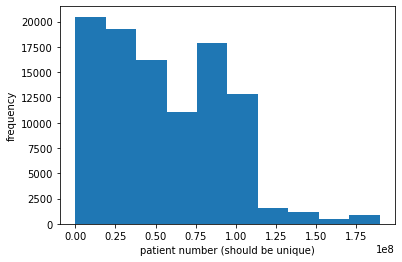

In [20]:
xl = d['patient_no']
plt.hist(xl)
plt.xlabel('patient number (should be unique)')
plt.ylabel('frequency')

In [21]:
d.drop_duplicates(subset ="patient_no", keep = False, inplace = True)

In [22]:
d

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157.0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,MC,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,MC,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545.0,Caucasian,Female,[70-80),1.0,1.0,7.0,9.0,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944.0,Other,Female,[40-50),1.0,1.0,7.0,14.0,MD,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494.0,Other,Female,[60-70),1.0,1.0,7.0,2.0,MD,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314.0,Caucasian,Female,[80-90),1.0,1.0,7.0,5.0,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [23]:

d['gender'].value_counts()

Female             28822
Male               25920
Unknown/Invalid        3
Name: gender, dtype: int64

In [24]:
d['age group'] = d['age group'].replace('[0-10)', 5).replace('[10-20)', 15).replace('[20-30)', 25).replace('[30-40)', 35).replace('[40-50)', 45).replace('[50-60)', 55).replace('[60-70)', 65).replace('[70-80)', 75).replace('[80-90)', 85).replace('[90-100)', 95)
d

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157.0,Caucasian,Female,5,6.0,25.0,1.0,1.0,MC,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189.0,Caucasian,Female,15,1.0,1.0,7.0,3.0,MC,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875.0,AfricanAmerican,Female,25,1.0,1.0,7.0,2.0,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376.0,Caucasian,Male,35,1.0,1.0,7.0,2.0,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267.0,Caucasian,Male,45,1.0,1.0,7.0,1.0,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545.0,Caucasian,Female,75,1.0,1.0,7.0,9.0,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,>5
101755,443842022,188574944.0,Other,Female,45,1.0,1.0,7.0,14.0,MD,...,No,Up,No,No,No,No,No,Ch,Yes,>5
101756,443842070,140199494.0,Other,Female,65,1.0,1.0,7.0,2.0,MD,...,No,Steady,No,No,No,No,No,No,Yes,>5
101758,443842340,120975314.0,Caucasian,Female,85,1.0,1.0,7.0,5.0,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [25]:
for i in d:
    print(d[i].value_counts(dropna = False))

116046918    1
68726016     1
55397628     1
149952792    1
93825528     1
            ..
344361338    1
440189060    1
17734008     1
184744308    1
173015040    1
Name: id, Length: 54745, dtype: int64
25165800.0     1
8694468.0      1
44677008.0     1
113902974.0    1
72576369.0     1
              ..
89963325.0     1
39159045.0     1
95095278.0     1
23773680.0     1
58720293.0     1
Name: patient_no, Length: 54745, dtype: int64
Caucasian          42566
AfricanAmerican     9557
Hispanic            1222
Other                974
Asian                426
Name: cast, dtype: int64
Female             28822
Male               25920
Unknown/Invalid        3
Name: gender, dtype: int64
75    13614
65    12313
55     9746
85     8571
45     5368
35     2142
95     1501
25      899
15      445
5       146
Name: age group, dtype: int64
1.0    27604
3.0    10968
2.0    10008
6.0     3807
5.0     2052
8.0      279
7.0       19
4.0        8
Name: admission_typeid, dtype: int64
1.0     34712
3.0    

In [26]:
d['Med'] = d['Med'].replace(np.nan, 'NO')
d['change'] = d['change'].replace(np.nan, 'NO')
d['number_diagnoses'] = d['number_diagnoses'].replace(np.nan, 'NO')
d['payer_code'] = d['payer_code'].replace(np.nan, 'MC')
d['max_glu_serum'] = d['max_glu_serum'].replace('>200', 1).replace('>300', 1).replace('None', 0).replace('Norm', 0)
d['A1Cresult'] = d['A1Cresult'].replace('>8', 1).replace('>7', 1).replace('None', 0).replace('Norm', 0)
d['rosiglitazone'] = d['rosiglitazone'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['pioglitazone'] = d['pioglitazone'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['glyburide'] = d['glyburide'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['glipizide'] = d['glipizide'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['glimepiride'] = d['glimepiride'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['metformin'] = d['metformin'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['insulin'] = d['insulin'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['repaglinide'] = d['repaglinide'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['nateglinide'] = d['nateglinide'].replace('No', 0).replace('Steady', 0).replace('Up', 2).replace('Down', 1)
d['Med'] = d['Med'].replace('No', 0).replace('Yes', 1)
d['change'] = d['change'].replace('Ch', 1).replace('No', 0)

In [27]:
d

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157.0,Caucasian,Female,5,6.0,25.0,1.0,1.0,MC,...,No,0,No,No,No,No,No,0,0,NO
1,149190,55629189.0,Caucasian,Female,15,1.0,1.0,7.0,3.0,MC,...,No,2,No,No,No,No,No,1,1,>5
2,64410,86047875.0,AfricanAmerican,Female,25,1.0,1.0,7.0,2.0,MC,...,No,0,No,No,No,No,No,0,1,NO
3,500364,82442376.0,Caucasian,Male,35,1.0,1.0,7.0,2.0,MC,...,No,2,No,No,No,No,No,1,1,NO
4,16680,42519267.0,Caucasian,Male,45,1.0,1.0,7.0,1.0,MC,...,No,0,No,No,No,No,No,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545.0,Caucasian,Female,75,1.0,1.0,7.0,9.0,MC,...,No,0,No,No,No,No,No,1,1,>5
101755,443842022,188574944.0,Other,Female,45,1.0,1.0,7.0,14.0,MD,...,No,2,No,No,No,No,No,1,1,>5
101756,443842070,140199494.0,Other,Female,65,1.0,1.0,7.0,2.0,MD,...,No,0,No,No,No,No,No,0,1,>5
101758,443842340,120975314.0,Caucasian,Female,85,1.0,1.0,7.0,5.0,MC,...,No,2,No,No,No,No,No,1,1,NO


In [28]:
for i in d:
    print(d[i].value_counts())

116046918    1
68726016     1
55397628     1
149952792    1
93825528     1
            ..
344361338    1
440189060    1
17734008     1
184744308    1
173015040    1
Name: id, Length: 54745, dtype: int64
25165800.0     1
8694468.0      1
44677008.0     1
113902974.0    1
72576369.0     1
              ..
89963325.0     1
39159045.0     1
95095278.0     1
23773680.0     1
58720293.0     1
Name: patient_no, Length: 54745, dtype: int64
Caucasian          42566
AfricanAmerican     9557
Hispanic            1222
Other                974
Asian                426
Name: cast, dtype: int64
Female             28822
Male               25920
Unknown/Invalid        3
Name: gender, dtype: int64
75    13614
65    12313
55     9746
85     8571
45     5368
35     2142
95     1501
25      899
15      445
5       146
Name: age group, dtype: int64
1.0    27604
3.0    10968
2.0    10008
6.0     3807
5.0     2052
8.0      279
7.0       19
4.0        8
Name: admission_typeid, dtype: int64
1.0     34712
3.0    

In [29]:
d.count()
d['label'].value_counts()

NO     42701
>5      9878
<30     2166
Name: label, dtype: int64

In [30]:
le = LabelEncoder()

In [31]:
d

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157.0,Caucasian,Female,5,6.0,25.0,1.0,1.0,MC,...,No,0,No,No,No,No,No,0,0,NO
1,149190,55629189.0,Caucasian,Female,15,1.0,1.0,7.0,3.0,MC,...,No,2,No,No,No,No,No,1,1,>5
2,64410,86047875.0,AfricanAmerican,Female,25,1.0,1.0,7.0,2.0,MC,...,No,0,No,No,No,No,No,0,1,NO
3,500364,82442376.0,Caucasian,Male,35,1.0,1.0,7.0,2.0,MC,...,No,2,No,No,No,No,No,1,1,NO
4,16680,42519267.0,Caucasian,Male,45,1.0,1.0,7.0,1.0,MC,...,No,0,No,No,No,No,No,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545.0,Caucasian,Female,75,1.0,1.0,7.0,9.0,MC,...,No,0,No,No,No,No,No,1,1,>5
101755,443842022,188574944.0,Other,Female,45,1.0,1.0,7.0,14.0,MD,...,No,2,No,No,No,No,No,1,1,>5
101756,443842070,140199494.0,Other,Female,65,1.0,1.0,7.0,2.0,MD,...,No,0,No,No,No,No,No,0,1,>5
101758,443842340,120975314.0,Caucasian,Female,85,1.0,1.0,7.0,5.0,MC,...,No,2,No,No,No,No,No,1,1,NO


# Encoding using fit_transform

In [32]:
for i in d:
    d[i] = le.fit_transform(d[i])
d

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,108,7735,2,0,0,5,23,0,0,7,...,0,0,1,0,0,0,0,0,0,2
1,16,28715,2,0,1,0,0,6,2,7,...,0,2,1,0,0,0,0,1,1,1
2,10,40131,0,0,2,0,0,6,1,7,...,0,0,1,0,0,0,0,0,1,2
3,37,38299,2,1,3,0,0,6,1,7,...,0,2,1,0,0,0,0,1,1,2
4,2,24180,2,1,4,0,0,6,0,7,...,0,0,1,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,54740,54520,2,0,7,0,0,6,8,7,...,0,0,1,0,0,0,0,1,1,1
101755,54741,54717,4,0,4,0,0,6,13,8,...,0,2,1,0,0,0,0,1,1,1
101756,54742,53247,4,0,6,0,0,6,1,8,...,0,0,1,0,0,0,0,0,1,1
101758,54743,52186,2,0,8,0,0,6,4,7,...,0,2,1,0,0,0,0,1,1,2


In [33]:
d.count()

id                          54745
patient_no                  54745
cast                        54745
gender                      54745
age group                   54745
admission_typeid            54745
discharge_disposition_id    54745
admission_source_id         54745
time_in_hospital            54745
payer_code                  54745
medical_specialty           54745
num_lab_procedures          54745
num_procedures              54745
num_medications             54745
number_outpatient           54745
number_emergency            54745
number_inpatient            54745
diag_1                      54745
diag_2                      54745
diag_3                      54745
number_diagnoses            54745
max_glu_serum               54745
A1Cresult                   54745
metformin                   54745
repaglinide                 54745
nateglinide                 54745
chlorpropamide              54745
glimepiride                 54745
acetohexamide               54745
glipizide     

# Plotting some graphs

In [34]:
import matplotlib.pyplot as plt

(array([1., 1., 1., 1., 2., 4., 4., 3., 2., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

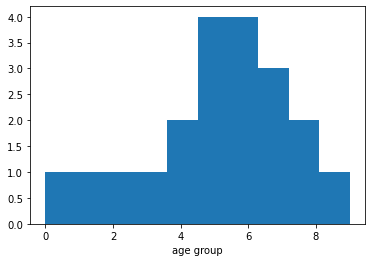

In [35]:
x = d['age group'].head(20)
y = d['label'].head(20)
plt.xlabel('age group')
plt.hist(x)

(array([ 2130.,  3587.,  5210.,  1036., 16741., 10138.,  3210.,  8910.,
         1964.,  1819.]),
 array([  0. ,  65.9, 131.8, 197.7, 263.6, 329.5, 395.4, 461.3, 527.2,
        593.1, 659. ]),
 <a list of 10 Patch objects>)

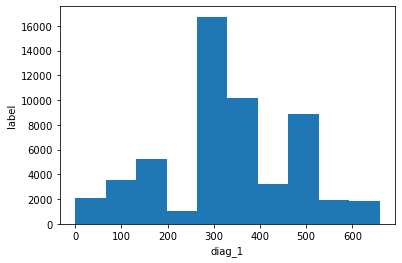

In [36]:
x = d['diag_1']
y = d['label']

plt.xlabel('diag_1')
plt.ylabel('label')

plt.hist(x)

(array([ 1976.,  8059.,  7223.,  7447., 12818.,  5798.,  4717.,  2677.,
         2888.,  1142.]),
 array([  0. ,  61.1, 122.2, 183.3, 244.4, 305.5, 366.6, 427.7, 488.8,
        549.9, 611. ]),
 <a list of 10 Patch objects>)

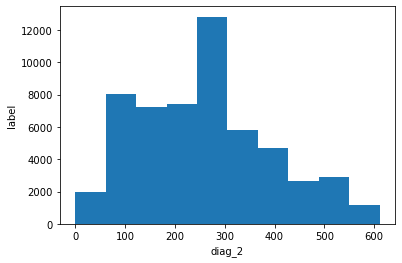

In [37]:
x = d['diag_2']
y = d['label']

plt.xlabel('diag_2')
plt.ylabel('label')

plt.hist(x)

(array([ 1532., 10680.,  7716.,  7699., 13592.,  4445.,  3369.,  2217.,
         2562.,   933.]),
 array([  0. ,  61.5, 123. , 184.5, 246. , 307.5, 369. , 430.5, 492. ,
        553.5, 615. ]),
 <a list of 10 Patch objects>)

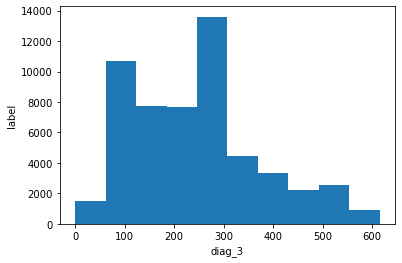

In [38]:
x = d['diag_3']
y = d['label']

plt.xlabel('diag_3')
plt.ylabel('label')

plt.hist(x)

(array([30791.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23954.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

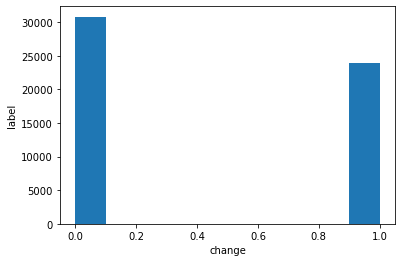

In [39]:
x = d['change']
y = d['label'].head(20)

plt.xlabel('change')
plt.ylabel('label')

plt.hist(x)

(array([5.2949e+04, 1.4890e+03, 1.9100e+02, 5.8000e+01, 2.5000e+01,
        1.8000e+01, 6.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

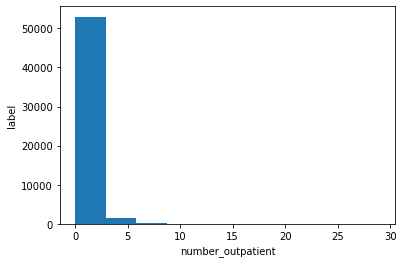

In [40]:
x = d['number_outpatient']
y = d['label']

plt.xlabel('number_outpatient')
plt.ylabel('label')

plt.hist(x)

(array([2.7604e+04, 1.0008e+04, 1.0968e+04, 0.0000e+00, 8.0000e+00,
        2.0520e+03, 0.0000e+00, 3.8070e+03, 1.9000e+01, 2.7900e+02]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

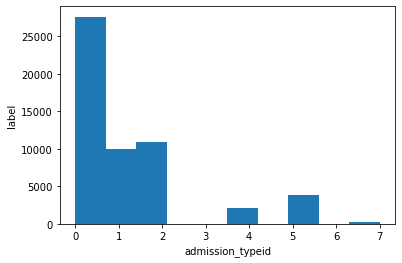

In [41]:
x = d['admission_typeid']
y = d['label'].head(20)

plt.xlabel('admission_typeid')
plt.ylabel('label')

plt.hist(x)

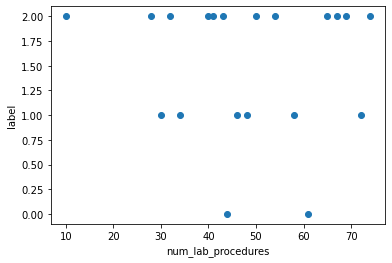

In [42]:
x = d['num_lab_procedures'].head(20)
y = d['label'].head(20)

plt.xlabel('num_lab_procedures')
plt.ylabel('label')

plt.scatter(x, y)

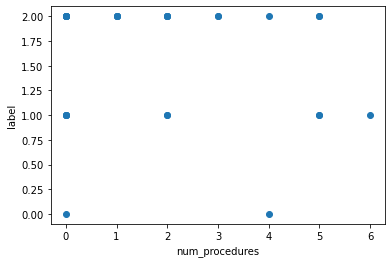

In [43]:
x = d['num_procedures'].head(30)
y = d['label'].head(30)

plt.xlabel('num_procedures')
plt.ylabel('label')

plt.scatter(x, y)

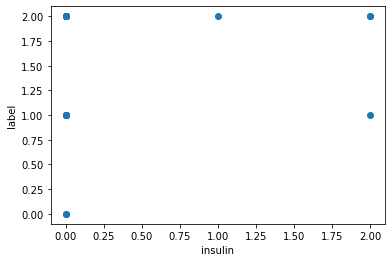

In [44]:
x = d['insulin'].head(20)
y = d['label'].head(20)

plt.xlabel('insulin')
plt.ylabel('label')

plt.scatter(x, y)

In [45]:
d.count()

id                          54745
patient_no                  54745
cast                        54745
gender                      54745
age group                   54745
admission_typeid            54745
discharge_disposition_id    54745
admission_source_id         54745
time_in_hospital            54745
payer_code                  54745
medical_specialty           54745
num_lab_procedures          54745
num_procedures              54745
num_medications             54745
number_outpatient           54745
number_emergency            54745
number_inpatient            54745
diag_1                      54745
diag_2                      54745
diag_3                      54745
number_diagnoses            54745
max_glu_serum               54745
A1Cresult                   54745
metformin                   54745
repaglinide                 54745
nateglinide                 54745
chlorpropamide              54745
glimepiride                 54745
acetohexamide               54745
glipizide     

In [46]:
for i in d:
    print(d[i].value_counts(dropna = False))

2047     1
661      1
12947    1
14994    1
8849     1
        ..
52531    1
50482    1
54576    1
11567    1
0        1
Name: id, Length: 54745, dtype: int64
2047     1
661      1
12947    1
14994    1
8849     1
        ..
52531    1
50482    1
54576    1
11567    1
0        1
Name: patient_no, Length: 54745, dtype: int64
2    42566
0     9557
3     1222
4      974
1      426
Name: cast, dtype: int64
0    28822
1    25920
2        3
Name: gender, dtype: int64
7    13614
6    12313
5     9746
8     8571
4     5368
3     2142
9     1501
2      899
1      445
0      146
Name: age group, dtype: int64
0    27604
2    10968
1    10008
5     3807
4     2052
7      279
6       19
3        8
Name: admission_typeid, dtype: int64
0     34712
2      6313
5      6077
17     1781
1      1158
10     1072
20      944
4       678
23      483
3       395
6       314
12      229
13      210
21      203
7        52
25       48
14       23
22       21
8         8
9         6
18        6
16        5
24   

# Machine Learning and Data splitting

In [47]:
from sklearn.preprocessing import normalize as nm

In [48]:
xD = d.drop(['label'], axis = 1)
xd = xD.drop(['medical_specialty', 'payer_code','metformin-rosiglitazone', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'citoglipton', 'examide', 'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'tolbutamide', 'acetohexamide', 'chlorpropamide', 'acarbose'], axis=1)
x = xd.to_numpy()
X = nm(x, norm='l2', axis=1, copy=True, return_norm = False)
y = d['label'].to_numpy()


In [49]:
xd.count()

id                          54745
patient_no                  54745
cast                        54745
gender                      54745
age group                   54745
admission_typeid            54745
discharge_disposition_id    54745
admission_source_id         54745
time_in_hospital            54745
num_lab_procedures          54745
num_procedures              54745
num_medications             54745
number_outpatient           54745
number_emergency            54745
number_inpatient            54745
diag_1                      54745
diag_2                      54745
diag_3                      54745
number_diagnoses            54745
max_glu_serum               54745
A1Cresult                   54745
metformin                   54745
repaglinide                 54745
nateglinide                 54745
glimepiride                 54745
glipizide                   54745
glyburide                   54745
pioglitazone                54745
rosiglitazone               54745
insulin       

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [51]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.8, random_state = 27)

# Normalizing data

In [52]:
norm = MinMaxScaler().fit(train_x)
train_x_norm = norm.transform(train_x)
test_x_norm = norm.transform(test_x)

train_x_stand = train_x
test_x_stand = test_x

In [53]:
scale = StandardScaler().fit(train_x_stand)
train_x_stand = scale.transform(train_x_stand)
test_x_stand = scale.transform(test_x_stand)

# Using various algorithms for data selection (including graph)

In [54]:
from sklearn.feature_selection import SelectFromModel as sfm
from sklearn.ensemble import RandomForestClassifier as rfc

In [55]:
Y = d[['label']]
e = sfm(rfc(n_estimators=100), max_features=24)
e.fit(xd, Y)

e_s = e.get_support()
e_f = xd.loc[:,e_s].columns.tolist()
print(str(len(e_f)), 'selected features')
print(e_f)

D:\Anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


13 selected features
['id', 'patient_no', 'age group', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses']


In [56]:
from sklearn.feature_selection import SelectKBest as sk
from sklearn.feature_selection import chi2 as ch 
from sklearn.ensemble import ExtraTreesClassifier

<ipython-input-57-21aecff1e4c7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(xd, Y)


[0.08255179 0.09250585 0.02231018 0.02509422 0.05118464 0.03543304
 0.04119287 0.02993465 0.05508349 0.06592683 0.04548842 0.06163846
 0.0284386  0.01826652 0.04185728 0.06022506 0.06083561 0.06062853
 0.04452859 0.00355505 0.01369223 0.00474324 0.00075143 0.00021582
 0.00209399 0.00385715 0.00403305 0.00191263 0.00103185 0.01652089
 0.00233916 0.0150465  0.00708236]


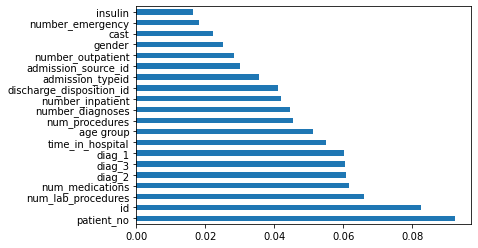

In [57]:
Y = d[['label']]
et = ExtraTreesClassifier()
et.fit(xd, Y)
print(et.feature_importances_)
fi = pd.Series(et.feature_importances_, index = xd.columns)
fi.nlargest(20).plot(kind = 'barh')

In [58]:
Y = d[['label']]
best = sk(score_func = ch, k = 10)
fit = best.fit(xd, Y)
dfsc = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(xd.columns)
fsc = pd.concat([dfcol, dfsc], axis = 1)
fsc.columns = ['features', 'score']
#columns
print(fsc.nlargest(100, 'score'))

                    features         score
1                 patient_no  1.447924e+07
0                         id  1.973744e+06
14          number_inpatient  6.480040e+03
9         num_lab_procedures  5.066577e+03
6   discharge_disposition_id  3.407758e+03
12         number_outpatient  1.445552e+03
13          number_emergency  8.579575e+02
17                    diag_3  7.474314e+02
8           time_in_hospital  4.929520e+02
11           num_medications  4.390776e+02
7        admission_source_id  4.340529e+02
16                    diag_2  4.196459e+02
18          number_diagnoses  3.809415e+02
5           admission_typeid  3.015679e+02
15                    diag_1  1.110327e+02
4                  age group  1.015243e+02
2                       cast  4.384158e+01
27              pioglitazone  4.057084e+01
32                       Med  3.961939e+01
25                 glipizide  2.780286e+01
31                    change  1.627458e+01
28             rosiglitazone  1.445200e+01
22         

In [59]:
d['label'].value_counts()

2    42701
1     9878
0     2166
Name: label, dtype: int64

In [60]:
xd

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,Med
0,108,7735,2,0,0,5,23,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,16,28715,2,0,1,0,0,6,2,58,...,0,0,0,0,0,0,2,1,1,1
2,10,40131,0,0,2,0,0,6,1,10,...,0,0,0,0,0,0,0,1,0,1
3,37,38299,2,1,3,0,0,6,1,43,...,0,0,0,0,0,0,2,1,1,1
4,2,24180,2,1,4,0,0,6,0,50,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,54740,54520,2,0,7,0,0,6,8,49,...,0,0,0,2,0,0,0,1,1,1
101755,54741,54717,4,0,4,0,0,6,13,72,...,0,0,0,0,0,0,2,1,1,1
101756,54742,53247,4,0,6,0,0,6,1,45,...,0,0,0,0,0,0,0,1,0,1
101758,54743,52186,2,0,8,0,0,6,4,75,...,0,0,0,0,0,0,2,1,1,1


In [61]:
train_x

array([[36826, 23174,     2, ...,     1,     1,     1],
       [ 9540, 11847,     2, ...,     1,     0,     0],
       [ 8516, 10477,     1, ...,     1,     0,     0],
       ...,
       [36680,  2802,     2, ...,     1,     0,     1],
       [52920, 43839,     2, ...,     1,     1,     1],
       [ 5139, 11120,     2, ...,     1,     0,     0]], dtype=int64)

In [62]:
test_x

array([[38578, 27001,     2, ...,     1,     1,     1],
       [43735, 23097,     2, ...,     1,     1,     1],
       [21147,  3514,     2, ...,     1,     0,     1],
       ...,
       [19381, 14184,     2, ...,     1,     0,     1],
       [46648, 29372,     2, ...,     1,     1,     1],
       [25638, 24430,     2, ...,     1,     1,     1]], dtype=int64)

In [63]:
train_y

array([2, 2, 2, ..., 1, 2, 2])

In [64]:
test_y

array([2, 2, 2, ..., 2, 2, 2])

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier as knc

In [66]:
test_y

array([2, 2, 2, ..., 2, 2, 2])

# Using KNN classifier

In [67]:
# KNN METHOD
model = knc(n_neighbors=7)
model.fit(train_x, train_y)
pred = model.predict(test_x)

a1 = accuracy_score(test_y, pred)*100
f1 =  f1_score(test_y, pred, average='micro')*100

print("Accuracy : ", a1, '%')
print("F1 score : ", f1, '%')

Accuracy :  75.43154625993242 %
F1 score :  75.4315462599324 %


In [68]:
pred

array([2, 2, 2, ..., 2, 2, 1])

# Using Logistic regression method

In [69]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [70]:
# LOGISTIC REGRESSION METHOD
 
lr = LogisticRegression().fit(train_x_stand, train_y)
y_pred = lr.predict(test_x_stand)
score = lr.score(test_x_stand, test_y)

a9 = score*100
f9 =  f1_score(test_y, y_pred, average='micro')*100

print("Accuracy : ", a9, '%')
print("F1 score : ", f9, '%')


Accuracy :  77.76052607544068 %
F1 score :  77.76052607544068 %


In [71]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

# Using DecisionTreeClassifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtc = DecisionTreeClassifier().fit(train_x_norm,train_y)
pred_Y = dtc.predict(test_x_norm)

a2 = accuracy_score(test_y, pred_Y)*100
f2 =  f1_score(test_y, pred_Y, average='micro')*100

print("Accuracy : ", a2, '%')
print("F1 score : ", f2, '%')

Accuracy :  68.53593935519226 %
F1 score :  68.53593935519226 %


# Using AdaBoostClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [75]:
adc = AdaBoostClassifier().fit(train_x_norm, train_y)
prediction_y = adc.predict(test_x_norm)

a3 = accuracy_score(test_y, prediction_y)*100
f3 =  f1_score(test_y, prediction_y, average='micro')*100

print("Accuracy : ", a3, '%')
print("F1 score : ", f3, '%')

Accuracy :  77.82445885468992 %
F1 score :  77.82445885468991 %


# Using RandomForestClassifier

In [76]:
rfc = RandomForestClassifier().fit(train_x_norm, train_y)
prediction = rfc.predict(test_x_norm)

a4 = accuracy_score(test_y, prediction)*100
f4 =  f1_score(test_y, prediction, average='micro')*100

print("Accuracy : ", a4, '%')
print("F1 score : ", f4, '%')

Accuracy :  78.18065576765001 %
F1 score :  78.18065576765001 %


# Using GaussianNB from naive_bayes

In [77]:
from sklearn.naive_bayes import GaussianNB 

In [78]:
gnb = GaussianNB().fit(train_x, train_y) 
pre_y = gnb.predict(test_x)

a5 = accuracy_score(test_y, pre_y)*100
f5 =  f1_score(test_y, pre_y, average='micro')*100

print("Accuracy : ", a5, '%')
print("F1 score : ", f5, '%')

Accuracy :  76.4179377112065 %
F1 score :  76.41793771120652 %


# Using GradientBoostingClassifier

In [79]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(train_x_norm, train_y)
a6 = gbc.score(test_x_norm, test_y)
a6 = a6*100
predi_y = gbc.predict(test_x_norm)


f6 =  f1_score(test_y, predi_y, average='micro')*100

print("Accuracy : ", a6, '%')
print("F1 score : ", f6, '%')

Accuracy :  78.08932322586539 %
F1 score :  78.08932322586539 %


# Using HistGradientBoostingClassifier

In [81]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

In [82]:
hgb = HistGradientBoostingClassifier(max_iter=100).fit(train_x_norm, train_y)
a7 = hgb.score(test_x_norm, test_y)
a7 = a7*100
predh_y = hgb.predict(test_x_norm)

f7 =  f1_score(test_y, predh_y, average='micro')*100

print("Accuracy : ", a7, '%')
print("F1 score : ", f7, '%')

Accuracy :  78.21718878436387 %
F1 score :  78.21718878436387 %


# LinearDiscriminantAnalysis classifier

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
lda = LinearDiscriminantAnalysis().fit(train_x_norm, train_y)
P_y = lda.predict(test_x_norm)

a8 = accuracy_score(test_y, P_y)*100
f8 =  f1_score(test_y, P_y, average='micro')*100

print("Accuracy : ", a8, '%')
print("F1 score : ", f8, '%')

Accuracy :  77.4499954333729 %
F1 score :  77.4499954333729 %


# Classifiers and their respective accuracies and F scores using graphs

In [85]:
cl_list = ['KNN','Logistic Regression', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'LinearDiscriminantAnalysis']
acc_list = [a1, a9, a2, a3, a4, a5, a6, a7, a8]
f_list = [f1, f9, f2, f3, f4, f5, f6, f7, f8]

Text(0.5, 0, 'Accuracy (%)')

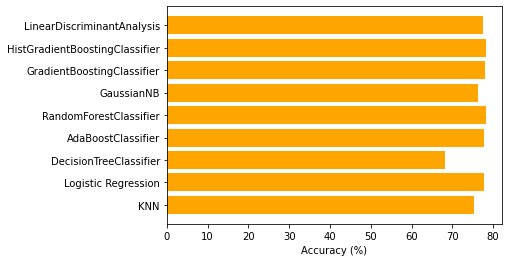

In [86]:
plt.barh(cl_list, acc_list, color = 'orange')
plt.xlabel('Accuracy (%)')

Text(0.5, 0, 'F score (%)')

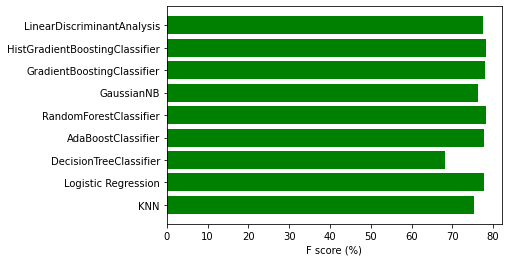

In [87]:
plt.barh(cl_list, f_list, color = 'green')
plt.xlabel('F score (%)')

([<matplotlib.patches.Wedge at 0x24405d1a190>,
 [Text(-0.37167472109886546, 1.0353057044641842, 'KNN'),
  Text(-0.9512247088951414, 0.5524233459832718, 'Logistic Regression'),
  Text(-1.0891360763982176, -0.15421610515084255, 'DecisionTreeClassifier'),
  Text(-0.7602339731674174, -0.7950121420721086, 'AdaBoostClassifier'),
  Text(-0.055201874652946695, -1.0986140145814638, 'RandomForestClassifier'),
  Text(0.6711249993884852, -0.8715453144821592, 'GaussianNB'),
  Text(1.076153746905045, -0.22780059925784257, 'GradientBoostingClassifier'),
  Text(0.9623662592002833, 0.5327768605643955, 'HistGradientBoostingClassifier'),
  Text(0.38120782115894813, 1.0318336092060811, 'LinearDiscriminantAnalysis')],
 [Text(-0.2027316660539266, 0.5647122024350095, '11.0%'),
  Text(-0.5188498412155316, 0.3013218250817846, '11.3%'),
  Text(-0.5940742234899369, -0.08411787553682319, '9.9%'),
  Text(-0.4146730762731367, -0.43364298658478645, '11.3%'),
  Text(-0.03011011344706183, -0.5992440079535256, '11.4%')

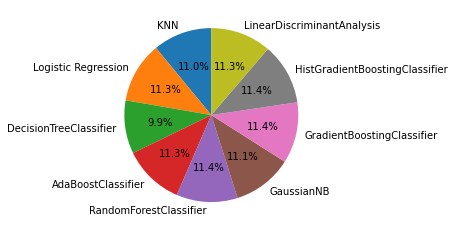

In [88]:
plt.pie(acc_list, labels = cl_list, autopct='%1.1f%%', startangle=90)

In [89]:
xd

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,Med
0,108,7735,2,0,0,5,23,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,16,28715,2,0,1,0,0,6,2,58,...,0,0,0,0,0,0,2,1,1,1
2,10,40131,0,0,2,0,0,6,1,10,...,0,0,0,0,0,0,0,1,0,1
3,37,38299,2,1,3,0,0,6,1,43,...,0,0,0,0,0,0,2,1,1,1
4,2,24180,2,1,4,0,0,6,0,50,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,54740,54520,2,0,7,0,0,6,8,49,...,0,0,0,2,0,0,0,1,1,1
101755,54741,54717,4,0,4,0,0,6,13,72,...,0,0,0,0,0,0,2,1,1,1
101756,54742,53247,4,0,6,0,0,6,1,45,...,0,0,0,0,0,0,0,1,0,1
101758,54743,52186,2,0,8,0,0,6,4,75,...,0,0,0,0,0,0,2,1,1,1


# Using HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, and LinearDiscriminantAnalysis (5 best models)

In [90]:
l1 = []
for i in P_y:
    l1.append(i)
print(l1)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 

In [91]:
l2 = []
for i in prediction_y:
    l2.append(i)
print(l2)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 

In [92]:
l3 = []
for i in prediction:
    l3.append(i)
print(l3)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 

In [93]:
l4 = []
for i in predi_y:
    l4.append(i)
print(l4)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 

In [94]:
l5 = []
for i in predh_y:
    l5.append(i)
print(l5)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [95]:
print(len(l3))

10949


In [96]:
label = []
for i in range(0, len(l3)):
    c0 = 0
    c1 = 0
    c2 = 0
    if(l1[i] == 1):
        c1 = c1 + 1
    elif(l1[i] == 2):
        c2 = c2 + 1
    else:
        c0 = c0 + 1
        
    if(l2[i] == 1):
        c1 = c1 + 1
    elif(l2[i] == 2):
        c2 = c2 + 1    
    else:
        c0 = c0 + 1
        
    if(l3[i] == 1):
        c1 = c1 + 1
    elif(l3[i] == 2):
        c2 = c2 + 1
    else:
        c0 = c0 + 1
        
    if(l4[i] == 1):
        c1 = c1 + 1
    elif(l4[i] == 2):
        c2 = c2 + 1
    else:
        c0 = c0 + 1
        
    if(l5[i] == 1):
        c1 = c1 + 1
    elif(l5[i] == 2):
        c2 = c2 + 1
    else:
        c0 = c0 + 1
    
    if(c1 > c0 and c1 > c2):
        label.append(1)
    elif(c2 > c1 and c2 > c0):
        label.append(2)
    else:
        label.append(0)
        
print(label)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 

In [97]:
test = []
for i in test_y:
    test.append(i)
print(test)

[2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 

In [98]:
len(label)

10949

In [99]:
count = 0
for i in range(0, len(label)):
    if (label[i] == test[i]):
        count = count + 1
print(count)

8542


In [100]:
print("ACCURACY BY MAJORITY : ", (count/len(label))*100, "%")

ACCURACY BY MAJORITY :  78.01625719243766 %
